<a href="https://colab.research.google.com/github/nomarine/Estatistica-com-Python/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
salario_min = 788
intervalo_renda = [dados.Renda.min(), (salario_min*2), (salario_min*5), (salario_min*15), (salario_min*25), dados.Renda.max()]
intervalo_renda

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [ ]:
labels_renda = ['E', 'D', 'C', 'B', 'A']
labels_renda

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
frequencia_renda = pd.cut(
    x = dados.Renda,
    labels = labels_renda,
    bins = intervalo_renda,
    include_lowest = True
).value_counts()
frequencia_renda.sort_index(ascending = False)

A      420
B      822
C     7241
D    18602
E    49755
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentual_renda = pd.cut(
    x = dados.Renda,
    labels = labels_renda,
    bins = intervalo_renda,
    include_lowest = True
).value_counts(normalize = True) * 100
percentual_renda.sort_index(ascending = False)

A     0.546590
B     1.069755
C     9.423477
D    24.208745
E    64.751432
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
distr_freq_renda = pd.DataFrame(
    {'Frequência': frequencia_renda, 'Percentual': percentual_renda}
)
distr_freq_renda.rename_axis('Classe', inplace=True)
distr_freq_renda

,Frequência,Percentual
Classe,,
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Classe'>

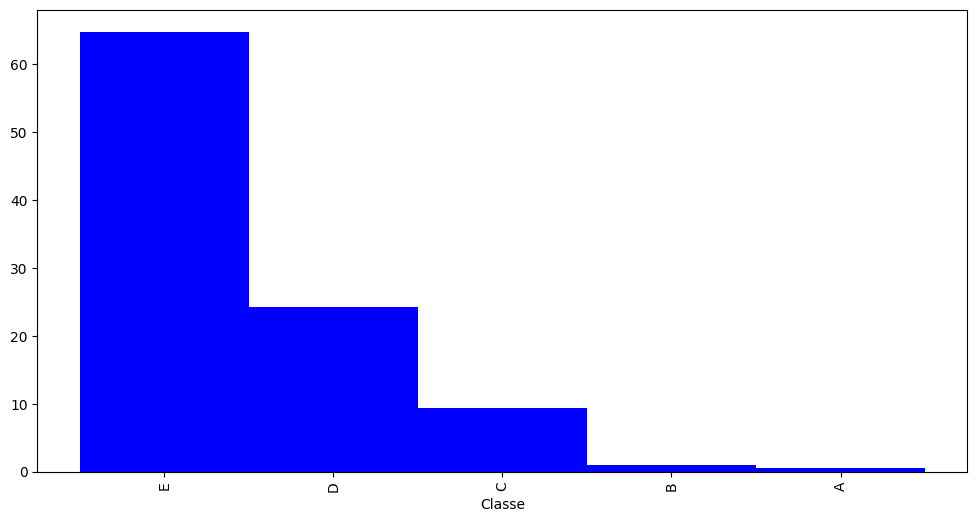

In [ ]:
distr_freq_renda['Percentual'].plot.bar(width=1, color='blue', figsize=(12,6))

In [ ]:
distr_freq_renda.loc[['D', 'C', 'B', 'A'], ['Frequência']].sum()[0]

27085

In [ ]:
distr_freq_renda['Frequência'].sum()

76840

> ### Conclusões

**Menos que 25%** dos responsáveis do domicílio **ganham mais do que 2 salários mínimos**, tendo a grande **maioria** uma **renda de até 2 salários mínimos ou menos**.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Text(0, 0.5, 'Responsáveis pelo Domicílio')

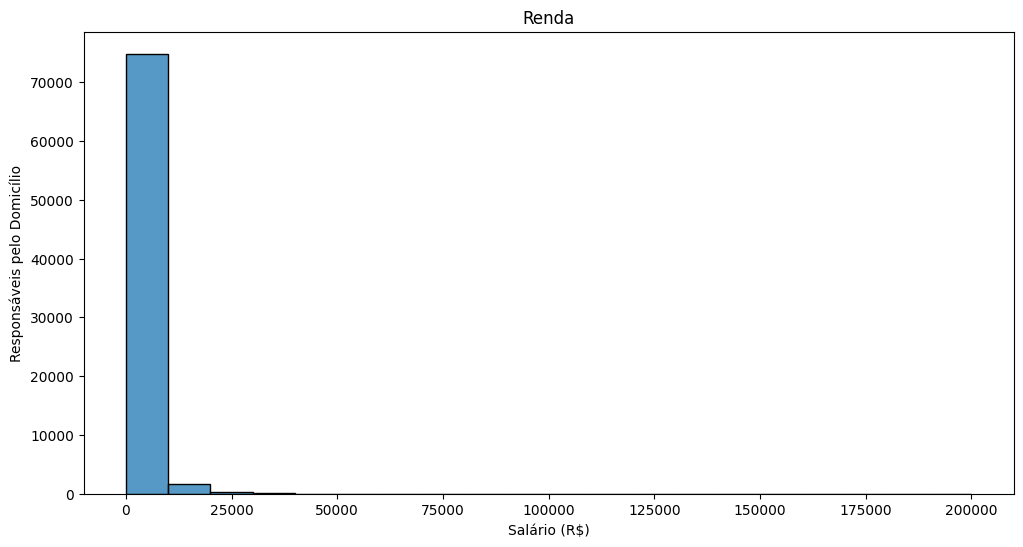

In [ ]:
chart_renda = sns.histplot(dados.Renda, bins=20)
chart_renda.figure.set_size_inches(12,6)
chart_renda.set_title('Renda')
chart_renda.set_xlabel('Salário (R$)')
chart_renda.set_ylabel('Responsáveis pelo Domicílio')

Text(0, 0.5, 'Responsáveis pelo Domicílio')

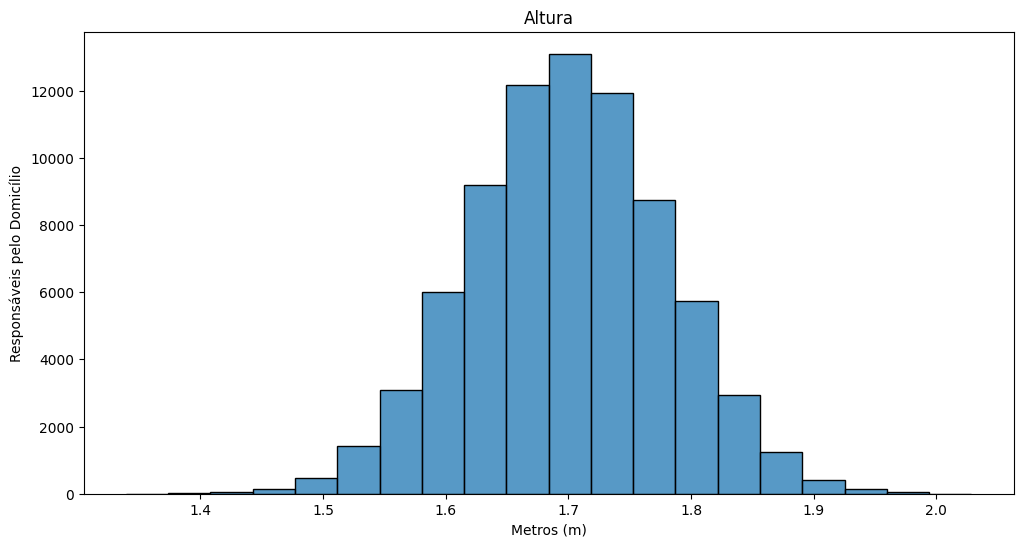

In [ ]:
chart_renda = sns.histplot(dados.Altura, bins=20)
chart_renda.figure.set_size_inches(12,6)
chart_renda.set_title('Altura')
chart_renda.set_xlabel('Metros (m)')
chart_renda.set_ylabel('Responsáveis pelo Domicílio')

Text(0, 0.5, 'Responsáveis pelo Domicílio')

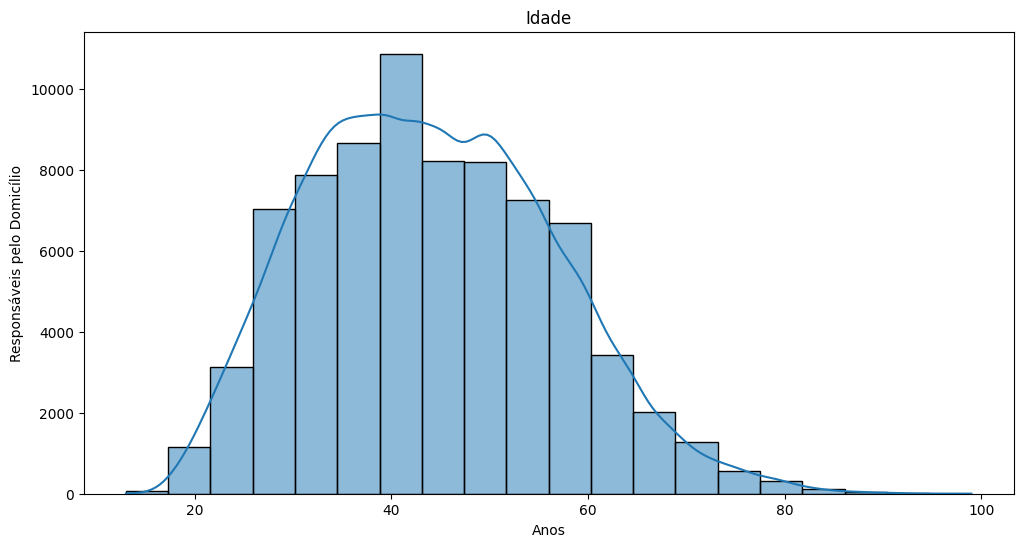

In [ ]:
chart_renda = sns.histplot(dados.Idade, bins=20, kde=True)
chart_renda.figure.set_size_inches(12,6)
chart_renda.set_title('Idade')
chart_renda.set_xlabel('Anos')
chart_renda.set_ylabel('Responsáveis pelo Domicílio')

> ### Conclusões

**Renda**

Nota-se que a distribuição ela tem uma deformação assimétrica à direita pois grande parte da amostra analisada tem uma renda menor que 2 salários mínimos. Isso pode sugerir que esses indivíduos não trabalham em setores bem valorizados ou que recebem benefícios para sustento básico da família.

**Altura**

Nota-se que a altura da amostra é distribuída de forma simétrica, havendo uma média por volta de 1.70m, que está dentro da média global de estatura média do ser humano.

**Idade**

Nota-se que temos uma deformidade levemente à direita da frequência de idades. Isso nos mostra que indivíduos da terceira idade são uma minoria na amostra, ainda mais em idades mais avançadas, além dos 80 anos.
Podemos ver também que os responsáveis pela família, em sua maioria, têm em torno de seus 40 anos.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0, 0.5, 'Responsáveis pelo Domicílio')

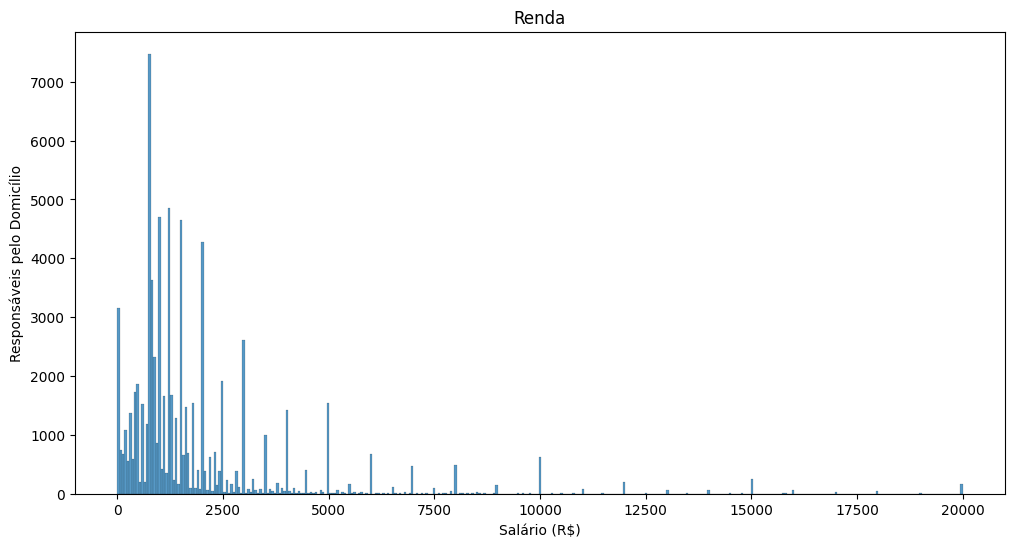

In [ ]:
chart_renda = sns.histplot(dados.Renda, binrange=(dados.Renda.min(), 20000))
chart_renda.figure.set_size_inches(12,6)
chart_renda.set_title('Renda')
chart_renda.set_xlabel('Salário (R$)')
chart_renda.set_ylabel('Responsáveis pelo Domicílio')

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
frequencia_sexo_cor = pd.crosstab(
     dados.Sexo,
     dados.Cor
)
frequencia_sexo_cor.rename(index = sexo, inplace = True)
frequencia_sexo_cor.rename(columns = cor, inplace = True)
frequencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual_sexo_cor = pd.crosstab(
     dados.Sexo,
     dados.Cor,
     normalize=True
) * 100
percentual_sexo_cor.rename(index = sexo, inplace = True)
percentual_sexo_cor.rename(columns = cor, inplace = True)
percentual_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Pelo cruzamento das característica de cor e sexo podemos verificar que a maioria dos responsáveis pelo domicílio são homens, sendo em sua maioria parda ou branca.
As mulheres, independente da raça, são minoria.
Isso indica uma disparidade de gênero, o que sugere que o paradigma de homens serem os chefes da família ainda ser muito forte na sociedade.

Percebe-se também que exite uma minoria racial, sendo composta por indígenas, amarelos e pretos. Isso pode indicar que entre a população existem poucos indivíduos dessas classes ou que esses indivíduos dificilmente estão como responsáveis de seus lares.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
(dados.Renda - dados.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
renda_sexo_cor = pd.crosstab(
    dados.Sexo,
    dados.Cor,
    values = dados.Renda,
    aggfunc={'mean', 'median', 'max'}
)
renda_sexo_cor.rename(index = sexo, inplace = True)
renda_sexo_cor.rename(columns = cor, inplace = True)
renda_sexo_cor

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

**Máximo**

Verifica-se que as minorias raciais (indígena, amarela e preta) são as que têm menor renda máxima se comparado aos indivíduos brancos e pardos.
As mulheres também têm um valor máximo menor que os homens.
Porém, destaca-se que há um outlier em indivíduos indígenas do sexo feminino, com renda máxima de 120.000

**Média**

Indivíduos amarelos ganham, em média, mais que as outras raças. Podemos inferir influencias culturais da ascendência japonesa, tendo em vista que a excelência nos estudos e na vida profissional é muito destacada no contexto nipônico.
Pessoas pretas tem a menor média de renda, o que pode ser um reflexo do racismo estrutural do Brasil, onde esses indivíduos não tem acesso a oportunidades de ensino e consequentemente no ingresso em posições bem valorizadas no mercado de trabalho.

**Mediana**

Pela mediana podemos inferir que, apesar do salário máximo de uma mulher indígena ser 120.000, a distribuição da renda é menor se comparado a outras raças, tendo em vista que a mediana é de 788.00.
Homens amarelos possuem a maior mediana, indicando uma distribuição de renda maior que pessoas brancas ou pardas.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
renda_sexo_cor = pd.crosstab(
    dados.Sexo,
    dados.Cor,
    values = dados.Renda,
    aggfunc={'mad', 'var', 'std'}
)
renda_sexo_cor.rename(index = sexo, inplace = True)
renda_sexo_cor.rename(columns = cor, inplace = True)
renda_sexo_cor

<ipython-input-181-d6ea84ee7fb8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_sexo_cor = pd.crosstab(
<ipython-input-181-d6ea84ee7fb8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_sexo_cor = pd.crosstab(
<ipython-input-181-d6ea84ee7fb8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_sexo_cor = pd.crosstab(
<ipython-input-181-d6ea84ee7fb8>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_sexo_cor = pd.crosstab(
<ipython-input-181-d6ea84ee7fb8>:1: FutureWarning: The 'mad' method is deprecated and will b

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Como referido anteriormente, o outlier da classe de mulheres indígenas é destacado pelo seu desvio médio e padrão ser o maior da distribuição.
Mulheres apresentam menor variância na renda assim como pessoas indígenas.
A maior variância se encontra em homens pardos, com um desvio padrão um pouco acima de 2.300.
Pessoas brancas e amarelas apresentam uma desvio da média maior.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Cor'}, xlabel='R$', ylabel='Sexo'>

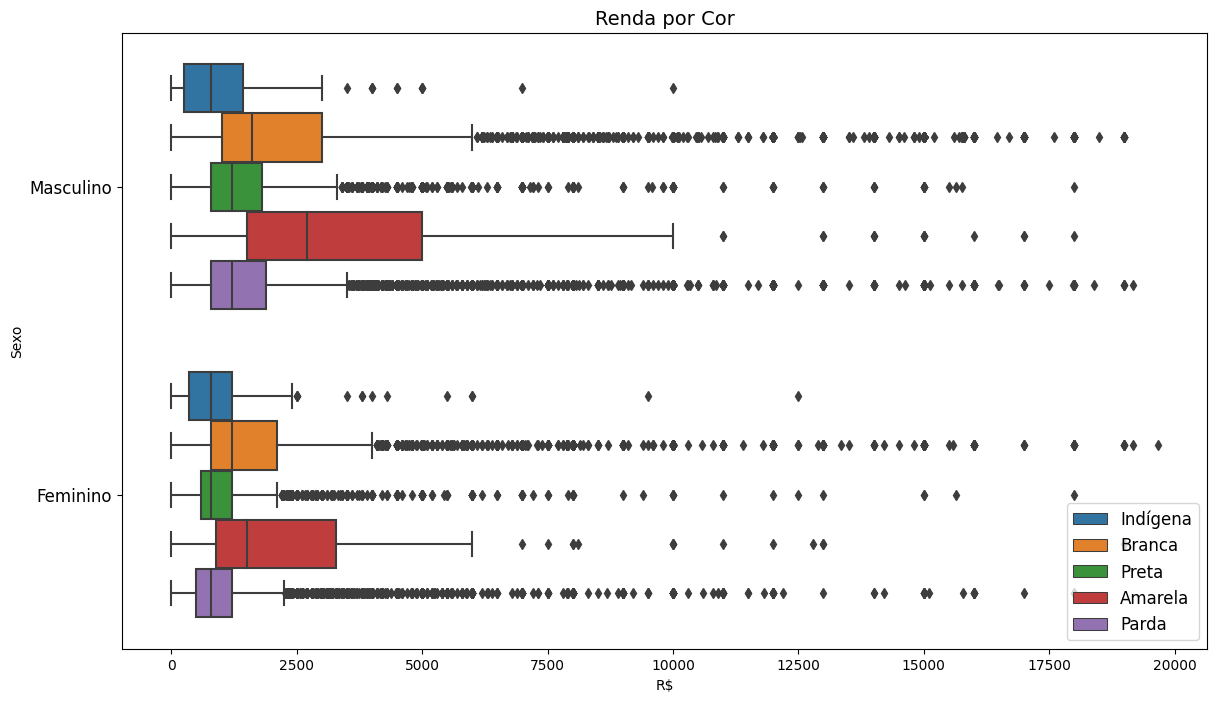

In [ ]:
boxplot_renda_sexo_cor = sns.boxplot(
    x = 'Renda',
    y = 'Sexo',
    hue = 'Cor',
    data = dados.query('Renda < 20000'),
    orient = 'h'
)
boxplot_renda_sexo_cor.figure.set_size_inches(14,8)
boxplot_renda_sexo_cor.set_title('Renda por Cor', fontsize=14)
boxplot_renda_sexo_cor.set_xlabel('R$')
boxplot_renda_sexo_cor.set_yticklabels([sexo[key] for key in sexo], fontsize=12)
handles, _ = boxplot_renda_sexo_cor.get_legend_handles_labels()
boxplot_renda_sexo_cor.legend(handles, [key for key in cor.values()], fontsize=12)
boxplot_renda_sexo_cor

> ### Conclusões

Grande parte da amostra tem uma renda menor que 5.000.

Há uma maior variância na renda de pessoas brancas e pardas.

Raças minoritárias possuem renda baixa.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats
percent_menor_igual_788 = stats.percentileofscore(dados.Renda, 788, kind='weak')
print("{0:.2f}%".format(percent_menor_igual_788))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
max_99 = dados.Renda.quantile(.99)
print("R$ {:.2f}".format(max_99))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
renda_estudo_sexo = pd.crosstab(
    dados['Anos de Estudo'],
    dados.Sexo,
    values = dados.Renda,
    aggfunc= {'mean', 'median', 'max', 'std'}
)
renda_estudo_sexo.rename(columns = sexo, inplace=True)
renda_estudo_sexo.rename(index = anos_de_estudo, inplace=True)
renda_estudo_sexo

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

In [ ]:
dados.query("(Renda > 4000) & (`Anos de Estudo` == 2) & (Sexo == 1)")

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda x Sexo x Cor'}, xlabel='Renda', ylabel='Sexo'>

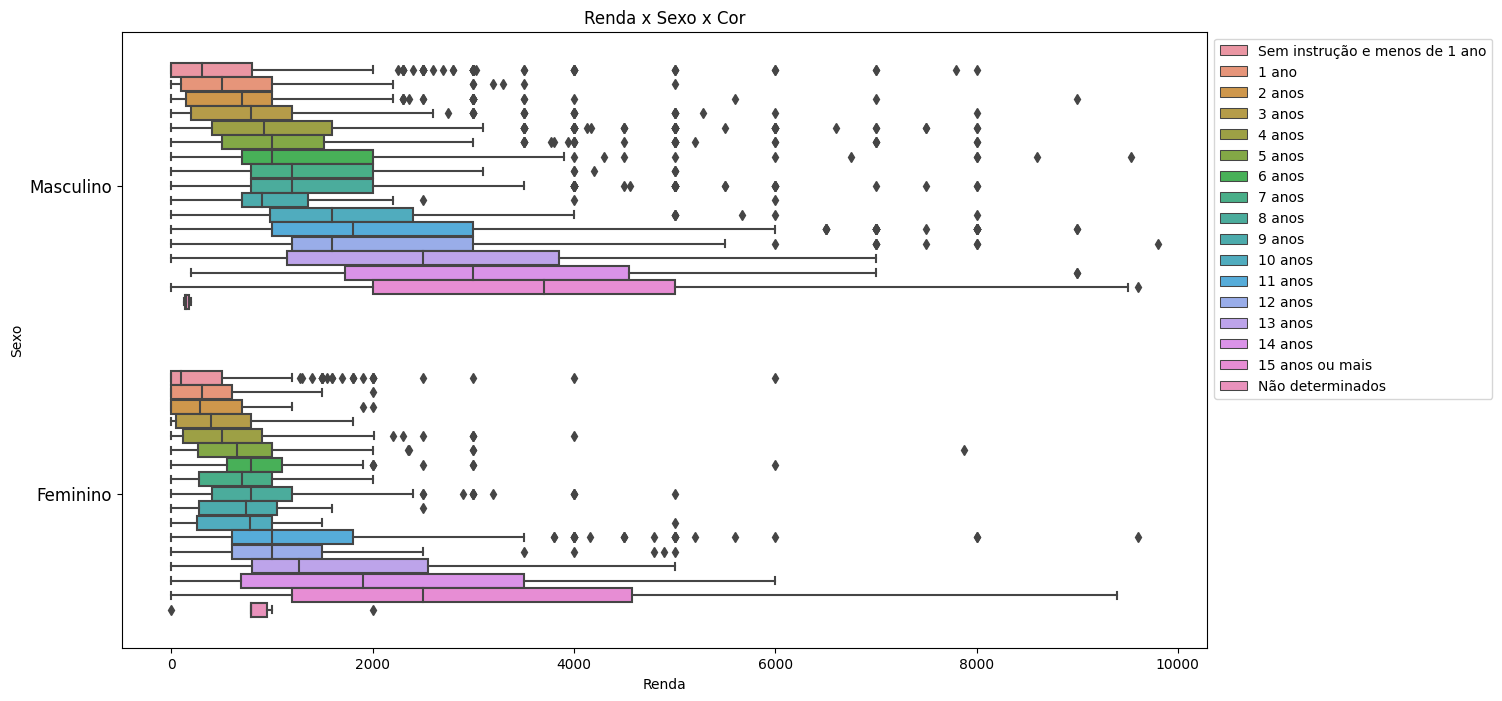

In [ ]:
boxplot_renda_estudo_sexo = sns.boxplot(
    x = 'Renda',
    y = 'Sexo',
    hue = 'Anos de Estudo',
    data = dados.query('Renda < 10000 and Idade >= 60'),
    orient = 'h'
)
boxplot_renda_estudo_sexo.set_yticklabels([sexo[key] for key in sexo], fontsize=12)
boxplot_renda_estudo_sexo.figure.set_size_inches(14,8)
boxplot_renda_estudo_sexo.set_title('Renda x Sexo x Cor')
handles, _ = boxplot_renda_estudo_sexo.get_legend_handles_labels()
boxplot_renda_estudo_sexo.legend(handles, [key for key in anos_de_estudo.values()], fontsize=12)
sns.move_legend(boxplot_renda_estudo_sexo, "upper left", bbox_to_anchor=(1, 1))
boxplot_renda_estudo_sexo

> ### Conclusões

Percebe-se que quanto maior os anos de estudo, maior a renda e também a variância.
Existem alguns outliers chamativos, como por exemplo dois indivíduos do sexo masculino que possuem 1 ano ou menos de instrução e que tem renda de 30.000.

Jovens

Percebe-se que a renda de jovens de até 20 anos de idade com mais tempo de estudos é maior que jovens mulheres com o mesmo tempo de estudo.

Jovens Adultos
Pessoas com idade entre 21 e 30 anos com menos de 10 anos de estudo possuem renda mais próxima de um salário mínimo.
Apesar de anos de estudo iguais, mulheres têm uma renda menor que os homens

Adultos
Pessoas com idade entre 31 e 60 anos possuem proporção muito semelhante, apesar de as mulheres ainda receberem salário menores.
Nota-se também que o desvio é bem maior.

Idosos
Pessoas acima de 60 anos possuem menor variância.
Mulheres que possuem menos de 15 anos de estudo têm uma renda de no máximo 2.000.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
renda_uf = dados.groupby(['UF']).agg({'Renda':['mean', 'median', 'max', 'std']})
renda_uf.rename(index=uf, inplace=True)
renda_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda x UF'}, xlabel='Renda', ylabel='UF'>

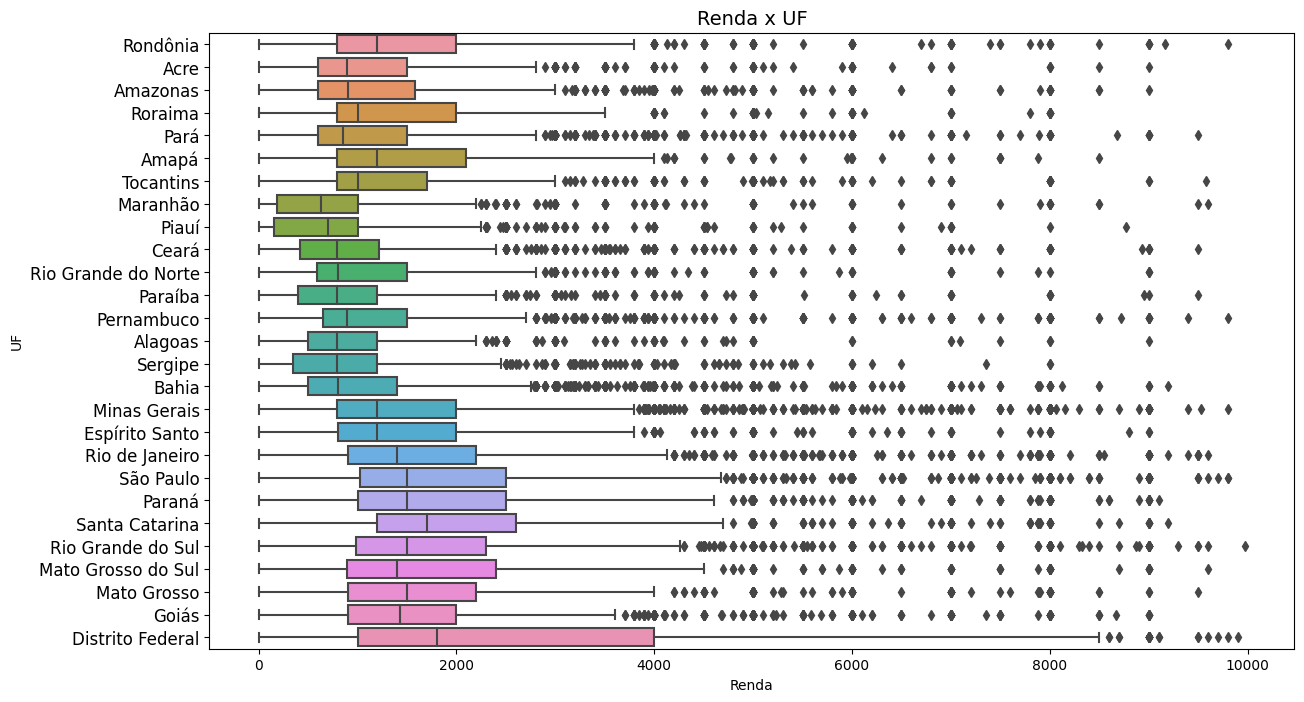

In [ ]:
boxplot_renda_uf = sns.boxplot(
    x = 'Renda',
    y = 'UF',
    data = dados.query('Renda < 10000'),
    orient = 'h',
)
boxplot_renda_uf.figure.set_size_inches(14,8)
boxplot_renda_uf.set_title('Renda x UF', fontsize=14)
boxplot_renda_uf.set_yticklabels([key for key in uf.values()], fontsize=12)
boxplot_renda_uf

> ### Conclusões

**Norte**

Possui renda semelhante porém levemente menor que os estados do Sudeste.

**Nordeste**

Podemos verificar que os estados do Nordeste possuem uma renda menor se comparado aos estados do Sul e Sudeste que possuem uma renda maior.

**Sul e Sudeste**

Possuem média da renda alta e grande variância.


**Centro-Oeste e DF**

Possuem maior renda. O Distrito Federal possui menor variância.